In [315]:
import pandas as pd
import matplotlib.pyplot as plt


In [316]:
tabela_vida = pd.read_csv("life_expectancy.csv")

## Optei por formatar o nome das colunas para facilitar na hora de chamar como objetos
tabela_vida.columns = ["index","Country","Country_code","Year", "Female_LE","Male_LE","Population","LE_gap"]

tabela_vida= tabela_vida.drop(["index","Country_code"], axis = "columns")
tabela_vida

# tabela_vida.Country.unique()
    

,Country,Year,Female_LE,Male_LE,Population,LE_gap
0,Abkhazia,2015,66.168444,61.202554,2.131189e+07,-4.96589
1,Afghanistan,1950,28.400000,27.100000,7.480464e+06,-1.30000
2,Afghanistan,1951,28.600000,27.400000,7.571542e+06,-1.20000
3,Afghanistan,1952,29.100000,27.800000,7.667534e+06,-1.30000
4,Afghanistan,1953,29.600000,28.300000,7.764549e+06,-1.30000
...,...,...,...,...,...,...
16998,Zimbabwe,2017,63.000000,58.200000,1.475110e+07,-4.80000
16999,Zimbabwe,2018,63.600000,59.000000,1.505219e+07,-4.60000
17000,Zimbabwe,2019,63.700000,58.600000,1.535461e+07,-5.10000
17001,Zimbabwe,2020,63.900000,58.100000,1.566966e+07,-5.80000


Text(0.5, 1.0, 'Expectativa de vida por ano em Brazil')

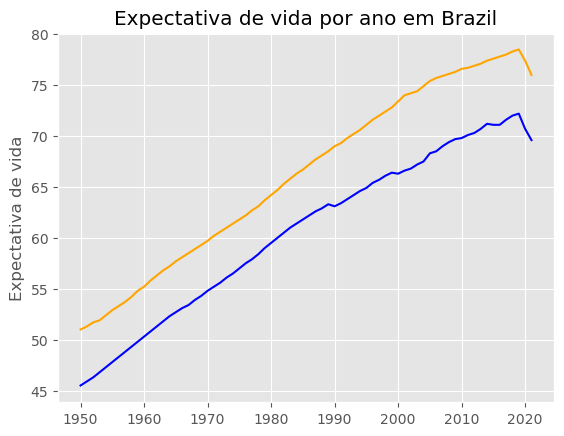

In [317]:
## Como a quantidade de países é enorme, antes de fazer a análise mundial, 
## optei por dar opção de escolher o país que deseja verificar a evolução ao longo do anos.
## Dessa forma, é possível comparar com eventos mundiais, como guerras e a pandemia. 
## Caso não seja escolhido um país, por padrão o gráfico retornado será do Brasil.
pais_escolhido = str(input("Qual país você quer ver a análise? (padrão: Brasil)"))

if pais_escolhido.upper() not in tabela_vida.Country.str.upper(): pais_escolhido = "Brazil"

mapeamento_pais = tabela_vida.loc[tabela_vida.Country.str.upper() == pais_escolhido.upper()]

# mapeamento_pais
plt.style.use("ggplot")
plt.plot(mapeamento_pais.Year, mapeamento_pais.Female_LE, color ="orange")
plt.plot(mapeamento_pais.Year, mapeamento_pais.Male_LE, color = "blue")
plt.ylabel("Expectativa de vida")
plt.title(f"Expectativa de vida por ano em {pais_escolhido.capitalize()}")

[]

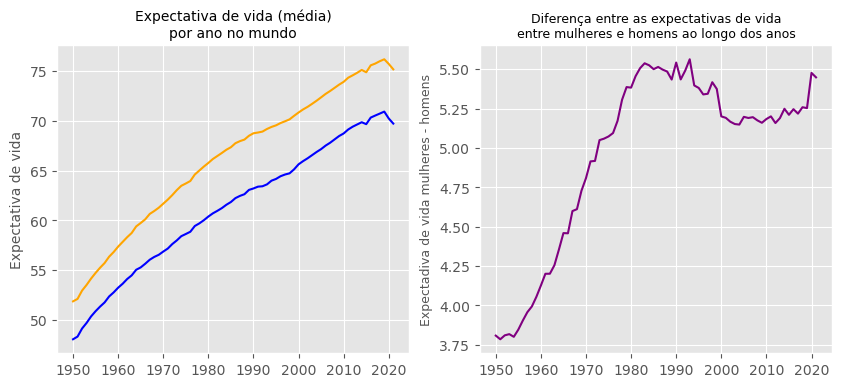

In [318]:

## Média da expectativa de vida no mundo
tabela_agregado = tabela_vida.drop(["Country"], axis= "columns").groupby(["Year"]).mean()

## Organizando os graficos lado a lado
graficos = plt.figure(figsize=(10,4))

## Comparação por sexo
graficos.add_subplot(121)
plt.plot(tabela_agregado.index, tabela_agregado.Female_LE, color ="orange")
plt.plot(tabela_agregado.index, tabela_agregado.Male_LE, color = "blue")
plt.ylabel("Expectativa de vida", loc="center", fontsize = 10)
plt.title("Expectativa de vida (média)\npor ano no mundo", loc= "center", fontsize= 10)

## Diferença de idade média entre homens e mulheres
graficos.add_subplot(122)
plt.plot(tabela_agregado.index, tabela_agregado.LE_gap*(-1), color= "purple")
plt.ylabel("Expectadiva de vida mulheres - homens", loc = "center", fontsize= 9)
plt.title("Diferença entre as expectativas de vida\nentre mulheres e homens ao longo dos anos", loc="center", fontsize = 9)

plt.plot()


Text(0, 0.5, 'Quantidade de anos')

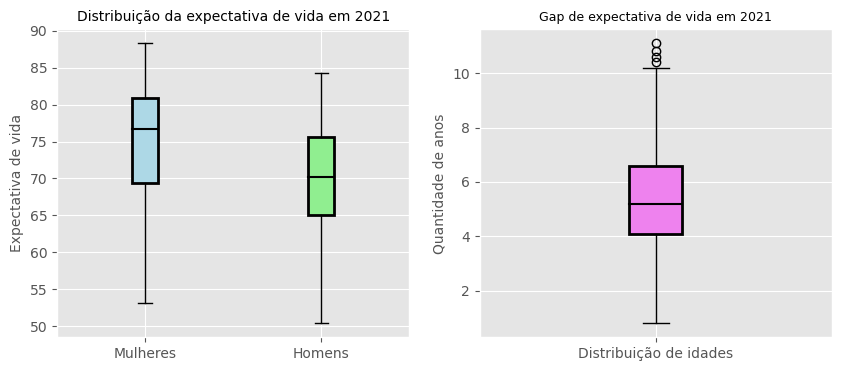

In [319]:
## Da mesma forma que aconteceu com os países, a quantidade de anos é muito grande
## para colocar todas as distribuições em um só gráfico. Portanto, é optado por dispor da
## análise por ano, uma vez que já se tem os gráficos com as médias mundiais.
## Caso o ano informado não esteja disponível no banco de dados ou a entrada não seja um número,
## por padrão, o ano retornado será 2021.

## Recebendo de entrada o ano que deseja observar a distribuição da expectativa de vida,
## o gráfico será retornado mesmo em caso de erro.
ano_desejado = input("Qual ano deseja observar a distribuição da expectativa de vida no mundo? (padrão: 2021)")
try:
    if (int(ano_desejado) not in tabela_vida.Year): 
        ano_desejado = 2021
    else: ano_desejado = int(ano_desejado)
except ValueError:
    ano_desejado = 2021

graficos = plt.figure(figsize=(10,4))
## Organização da tabela por ano
tabela_distribuicao = tabela_vida.loc[tabela_vida.Year == ano_desejado]

graficos.add_subplot(121)
distribuicao = plt.boxplot([tabela_distribuicao.Female_LE, tabela_distribuicao.Male_LE],
                            labels = ["Mulheres", "Homens"], patch_artist=True,
                            medianprops = dict(color = "black", linewidth=1.5))
distribuicao['boxes'][0].set(linewidth=2, facecolor= "lightblue")
distribuicao['boxes'][1].set(linewidth=2, facecolor= "lightgreen")

plt.title(f"Distribuição da expectativa de vida em {ano_desejado}", loc = "center", fontsize = 10)
plt.ylabel("Expectativa de vida", loc = "center", fontsize = 10)

graficos.add_subplot(122)
gap = plt.boxplot(tabela_distribuicao.LE_gap*(-1), labels = ["Distribuição de idades"], 
                    patch_artist=True, boxprops= dict(linewidth = 2, facecolor = "violet"),
                    medianprops = dict(color = "black", linewidth=1.5))
plt.title(f"Gap de expectativa de vida em {ano_desejado}", loc = "center", fontsize = 9)
plt.ylabel("Quantidade de anos", loc = "center", fontsize = 10)


In [320]:
## Outra possíbilidade com esses dados é analisar o crescimento populacional mundial ao longo dos anos.
## Para isso, vamos verificar se todos os anos tem a mesma quantidade de informações, permitindo construir uma curva mais real possível

tabela_vida.Year.value_counts()
## Perceba que o ano de 2015 tem 11 paises a mais que os demais anos. Para corrigir isso, vamos ver quais países estão em 2015.

## Identificando os países que só possuem dados em 2015
verificar_unicos = pd.DataFrame([tabela_vida.groupby("Country").Year.sum()]).T
lista_valores_unicos = verificar_unicos.loc[verificar_unicos.Year == 2015]
lista_valores_unicos = lista_valores_unicos.index.to_list()


## Vamos retirar esses países da lista.
tabela_vida = tabela_vida.set_index("Country").drop(lista_valores_unicos).reset_index("Country")

## Caso queira ver o gráfico do bloco abaixo sem essa mudança, basta comentar a linha acima

Text(0, 0.5, 'População mundial (bilhões de hab.)')

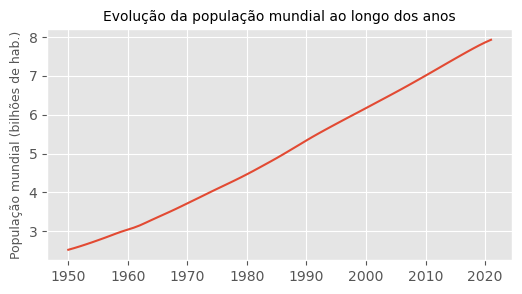

In [321]:
Populacao_mundial = pd.DataFrame([tabela_vida.groupby("Year").Population.agg("sum")]).T ## Fazendo a contagem da população mundial em cada ano

## Pela tabela inicial é possível notar que os anos já estão na ordem de bilhões de habitantes, portanto, podemos trabalhar com essa ordem de grandeza
Populacao_mundial.Population = Populacao_mundial.Population / 1000000000 

plt.figure(figsize=(6,3))
plt.plot(Populacao_mundial.index,Populacao_mundial.Population)
plt.title("Evolução da população mundial ao longo dos anos", loc = "center", fontsize = 10)
plt.ylabel("População mundial (bilhões de hab.)", loc = "center", fontsize = 9)